# Dropout

Dropout is a popular regularization technique for neural networks. Dropout is a probability that tells us how likely we are to turn off an individual neuron independently. Let's say that we have a probability of 0.2 to turn off a neuron. So, what we're doing is actually calculating the value for the neuron in the forward step. We repeat the process again for the $k$-th iteration. Important to say that PyTorch normalizes the values ($\frac{1}{1-p}$ in each layer) in the training phase - other methods may do it in the testing phase.

<img src="images/dropout.svg" width="30%">

## Dropout in PyTorch

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, in_size, n_hidden, out_size, p=0):
        super(Net, self).__init__()
        self.dropout = nn.Dropout(p=p)
        self.linear1 = nn.Linear(in_size, n_hidden)
        self.linear2 = nn.Linear(n_hidden, n_hidden)
        self.linear3 = nn.Linear(n_hidden, out_size)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = self.dropout(x)
        x = F.relu(self.linear2(x))
        x = self.dropout(x)
        x = self.linear3(x)
        return x

In [2]:
# Using nn.Sequential, we have
model = torch.nn.Sequential(nn.Linear(1,10),
                            nn.Dropout(0.5),
                            nn.ReLU(),
                            nn.Linear(10,12),
                            nn.Dropout(0.5),
                            nn.ReLU(),
                            nn.Linear(12,1))

Using `dropout` we have to set the model to train and then to evaluation, since it normalizes scores in training phase

In [ ]:
# during training phase, set model to train()
model.train()
for epoch in range(100):
    for x, y in trainloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
#then set model to evaluation
model.eval()
yhat = model(x)

# Uniform Distribution

Initialize weights based on the following range

$$\frac{1}{-\sqrt{L_s}}\ \ \ \text{and}\ \ \ \frac{1}{\sqrt{L_s}}$$

where $L_s$ is the boundary. This distribution has the following shape

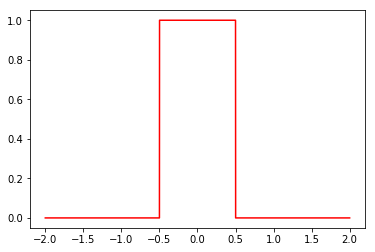

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

X = np.arange(-2, 2, 0.0001)
y = []
for v in X:
    if v <= -0.5 or v >= 0.5:
        y.append(0)
    else:
        y.append(1)
plt.plot(X, y, 'r-')
plt.show()

# Xavier Initialization

Initialize weights based on the following range

$$\frac{\sqrt{6}}{-\sqrt{L_{out} + L_{in}}}\ \ \ \text{and}\ \ \ \frac{\sqrt{6}}{\sqrt{L_{out} + L_{in}}}$$

where $L_{in}$ is the number of input neurons and $L_{out}$ the number of output neurons in the layer.

In [ ]:
# In Pytorch
linear = nn.Linear(input_size, output_size)
torch.nn.init.xavier_uniform_(linear.weights)

# He Initialization

It draws samples from a uniform distribution within (-limit, limit) where limit is $\sqrt{\frac{6}{n_{in}}}$ with $n_{in}$ is the number of input units in the weight tensor.

In [ ]:
# In Pytorch
linear = nn.Linear(input_size, output_size)
torch.nn.init.kaiming_uniform_(linear.weight, nonlinearity='relu')

# Gradient Descent with Momentum

Unlike the traditional Gradient Descent that uses only the gradient of the current step to guide the search, Momentum also accumulates the gradient of the past steps to determine what direction to go. In traditional gradient descent, we update weights as:

$$w_2 = - \alpha \nabla_{w_1}$$

where the weights $w_2$ are weights used in the next iteration and $w_1$ are the weights used in the current iteration. In Momentum, we add a variable to the velocity ($v$) and a variable to the coeficient of friction ($\mu$), which usually is set to 0.5, 0.9 or 0.95. The update using moment becomes:

$$v_2 = \mu v_1 - \eta \nabla_{w_1}$$
$$w_2 = w_1 + v_2$$

In PyTorch, we add a value to the variable `momentum` in the SGD call as:

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.4)

# Batch Normalization

We apply batch normalization on the activations before we pass it to the activation function. Consider the following neural network:

<img src="images/neural_network.svg" width="30%"/>

Suppose we have three neurons in the first hidden layer and four neurons in the second hidden layer in this network. Now let's consider the first layer. In order to apply batch normalization, we calculate the mean and standard deviation or variance for a particular mini batch. We then normalize the outputs, scale and shift them. Finally the output is passed to the activation function. For example, consider our input has the form:

$$\begin{matrix}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
\end{matrix}
\begin{bmatrix}
1 & 3 & 4 & 5 \\
3 & 4 & 8 & 1 \\
2 & 3 & 4 & 5 \\
3 & 3 & 3 & 3 \\
\end{bmatrix}
$$

We calculate the values of $Z^1$ for each neuron ($z_1^1$, $z_2^1$, and $z_3^1$) and obtain the matrix $Z^1$ as:

$$
\begin{matrix}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
\end{matrix}
\begin{bmatrix}
1 & 1 & 0 \\
1 & 0 & 0 \\
1 & 1 & 1 \\
1 & 0 & 0 \\
\end{bmatrix}
$$

We than calculate the mean and the standard deviation for all samples. Mean is calculated as

$$\mu_{B,1} = \frac{1}{M} \sum_{m=1}^{M} z_m$$

Having the mean for the first neuron ($z_1^1$) as

$$\mu_{B,1} = \frac{1}{4} (1+1+1+1) = 1$$

The standard deviation ($\sigma_{B,1}^2$) is calculated as

$$\sigma_{B,1}^2 = \frac{1}{M} \sum_{m=1}^{M} (z_m - \mu_{B,1})^2$$

We repeat this process for all the outputs of the second neuron ($\mu_{B,2}$ and $\sigma_{B,2}^2$) and for the third neuron ($\mu_{B,3}$ and $\sigma_{B,3}^2$), achieving:

$$
\begin{matrix}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
\mu_B \\
\sigma^2_B \\
\end{matrix}
\begin{bmatrix}
1 & 1 & 0 \\
1 & 0 & 0 \\
1 & 1 & 1 \\
1 & 0 & 0 \\
1 & 0.5 & 0.25 \\
0 & 0.25 & 0.1875 \\
\end{bmatrix}
$$

Then, we normalize the outputs with

$$ x_1 = \frac{z_1^1 - \mu_{B,1}}{\sqrt{\sigma^2_{B,1} + \epsilon}}$$

Thus, we have the following normalized matrix considering $\epsilon=0.0001$:

$$
\begin{matrix}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
\end{matrix}
\begin{bmatrix}
1 & 1 & 0 \\
1 & 0 & 0 \\
1 & 1 & 1 \\
1 & 0 & 0 \\
\end{bmatrix} \ \ \ \ \ \ \ \rightarrow\ \ \ \ \ \ \  x_n = \frac{z_n^1 - \mu_{B,n}}{\sqrt{\sigma^2_{B,n} + \epsilon}}\ \ \ \ \ \ \  \rightarrow\ \ \ \ \ \ \  \begin{matrix}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
\end{matrix}
\begin{bmatrix}
0 & 1 & -0.6 \\
0 & -1 & -0.6 \\
0 & 1 & 1.73 \\
0 & -1 & -0.6 \\
\end{bmatrix}
$$

We than scale and shift parameters using the following equation

$$z^1_n = \gamma_n^1 z^1_n + \beta_n^1$$

where $\gamma$ and $\beta$ are learned in training data. Considering $\gamma$ and $\beta$ as

$$
\gamma = \begin{bmatrix}
1 \\
1 \\
1.67 \\
\end{bmatrix}\ \ \ \ \ \ \ \ \ \beta = \begin{bmatrix}
1 \\
0 \\
0 \\
\end{bmatrix}
$$

We get the following scores

$$
\begin{matrix}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
\end{matrix}
\begin{bmatrix}
1 & 1 & -1 \\
1 & -1 & -1 \\
1 & 1 & 2.9 \\
1 & -1 & -1 \\
\end{bmatrix}
$$

Then, we repeat the process for the second layer. We calculate the mean and standard deviation, normalize the values, apply a second scale and shift parameter, and then we pass it the activation functions. Next, We repeat the process for the next batch, as we did it for $x_1$. So we have the second batch that we denote the matrix of our tensor $x_2$. We calculate a new mean and standard deviation and normalize it accordingly. In short, we repeat the whole process again. For prediction, we use the pre-computed matrices (i.e., generated with training data) of mean and standard deviation. 

## Batch Normalization in PyTorch

In [ ]:
class NetBatchNorm(nn.Module):
    def __init__(self, in_size, hidden_1, hidden_2, out_size):
        super(NetBatchNorm, self).__init__()
        self.linear1 = nn.Linear(in_size, hidden_1)
        self.linear2 = nn.Linear(hidden_1, hidden_2)
        self.linear3 = nn.Linear(hidden_2, out_size)

        self.bn1 = nn.BatchNorm1d(hidden_1)
        self.bn2 = nn.BatchNorm1d(hidden_2)

    def forward(self, x):
        x = F.relu(self.bn1(self.linear1(x)))
        x = F.relu(self.bn2(self.linear2(x)))
        x = self.linear3(x)
        return x